<a href="https://colab.research.google.com/github/Ardaolmez/Neuroscience-Projects/blob/main/Spike_Times_and_Poisson_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







In Computational Neuroscience, spike trains are often described as realisations of Poisson or Gamma processes. In
this exercise, we show how to generate realisations of such point processes in Python and how their statistics can be
characterised.

### 1. Poisson process (10 points + 3 optional points)
### (a) Spike train generation (2 points + 1 optional point)
Generate a realization (i.e., an array of spike times $[t_0, \dots, t_k, \dots]$) of a Poisson process (https://en.wikipedia.org/wiki/Poisson_process) with a spike rate of $\nu=10$ spikes/s in the time interval $[0, T ), T=600$s, using the following two methods:
   
i.\* (1 optional point) Randomly draw inter-spike intervals $X_i$ from an exponential distribution (https://en.wikipedia.org/wiki/Exponential_distribution) with the appropriate mean of the inter-spike interval, using `numpy.random.exponential`. The time of the $i$th spike is given by $t_i = t_{i−1} + X_i$. Assume $t_0=0$. Make sure that $t_i < T \; \forall i$.

Hint: you can calculate the mean inter-spike interval $\langle X_i \rangle_i$ from the spike rate of the process.

Hint: you can find information on `numpy`'s sampling methods here https://docs.scipy.org/doc/numpy/reference/routines.random.html and might want to use `numpy`'s cumulative sum function.

> <span style="font-size:10pt">
Note the unit “spikes/s”. Alternatively, you may use “counts/s”, “impulses/s” (ips) or just “1/s”. In Neuroscience (also in Computational Neuroscience), it is unfortunately very common to use “Hz” as a unit of the firing rate. Although it is mathematically correct (Hz = 1/s), this doesn’t make much sense and is often misleading: First, the unit “Hz” honours the work of the physicists Heinrich Hertz on electromagnetic waves. Electromagnetic waves are periodic signals. Spike trains, in contrast, are typically highly irregular (non-periodic) signals. The unit “Hz” should be used as a unit of frequency for periodic signals only. Second, in Neuroscience often both (irregular) spike trains and periodic signals (e.g. Fourier components of local-field potentials, EEG, etc.) are considered at the same time. Using different units for the spike frequency and the oscillation frequency leads to a much more transparent presentation of research results. </span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

def draw1(v,T):
    ß=1/v
    t=0
    lst=[]
    while t<T:

        t=np.random.exponential(ß)+t
        if t>T:
            break
        lst=np.append(lst,t)
    return lst
drawing1=draw1(10,600)
print(drawing1)





[  0.01933704   0.13138643   0.18516236 ... 599.22510121 599.28142787
 599.62465508]


ii. (2 points) First, draw the total number $N$ of spikes from a Poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution) with appropriate mean ($\sim$ rate of the process). Randomly draw $N$ spike times $\{t_1, t_2, \dots, t_N\}$ from a uniform distribution in the interval $[0, T )$. Sort spike times in ascending order using `numpy.sort(...)` (see lecture slides “The Poisson point process - a recipe “).

[  0.03274489   0.09461423   0.09710558 ... 599.81373041 599.89415494
 599.93087029]


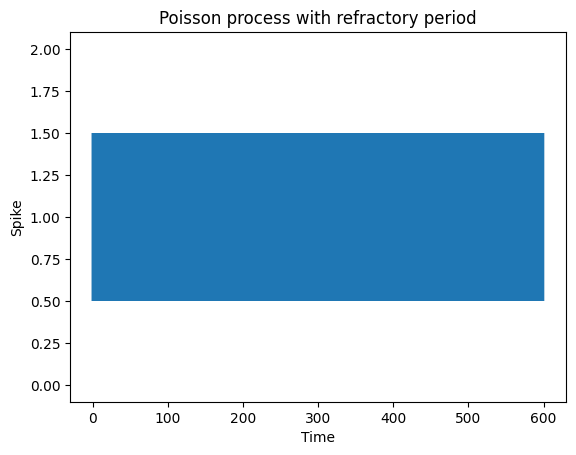

In [ ]:
# type your code here
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

def draw2(v,T):
    N=v*T
    lst=list(np.random.uniform(0,T,N))
    lst=np.sort(lst)
    return lst
drawing2=draw2(10,600)
print(drawing2)



### (b) Spike-count statistics (4 points + 2 optional points)
i. (2 points) For the spike train generated in __(a)__, compute the numbers $N_1^h, N_2^h, \dots, N_{T/h}^h$ of spikes (spike counts) in consecutive, non-overlapping time intervals $[(k − 1)h, kh), k = 1, 2, \dots, T/h$, of length $h=0.5$s (“bin size”) using `numpy.histogram`. Visualise the time series (e.g, using `matplotlib.pyplot.bar` or `pylab.bar`). Label your plot appropiately.

> <span style="font-size:10pt"> For more detailed information on plotting tools, see [the matplotlib homepage](http://matplotlib.org), in particular, [the gallery](http://matplotlib.org/gallery.html).</span>

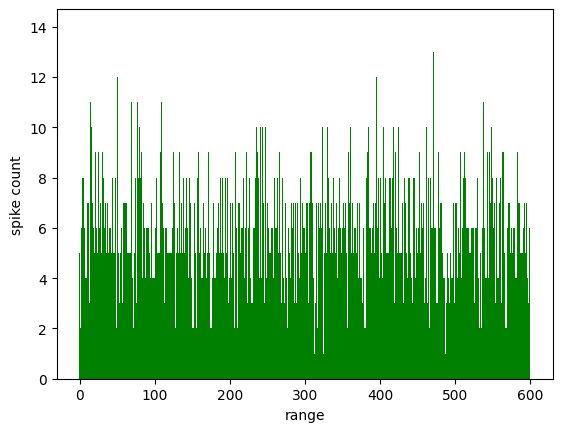

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
h=0.5

bins=np.arange(0,600.5,h)

x,y=np.histogram(drawing2,bins )



plt.bar(y[:-1],x,color='green')
plt.xlabel("range")
plt.ylabel("spike count")
plt.show()


ii. (2 points) Calculate the mean, the variance and the Fano factor (https://en.wikipedia.org/wiki/Fano_factor) of the measured spike counts across time bins using `numpy`. Compare these numbers with the theoretical values (see lecture).

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
mean=np.mean(x)
varianz=np.var(x)
fano=varianz/mean
print(mean,varianz,fano)
'''
Variance,mean and fano numbers are similar with theoretical values.
Mean and variance values are approximately 2=10*0,5=spikerate*binsize.Fano is approximately
1=mean/variance.
'''

5.0 4.95 0.99


'\nVariance,mean and fano numbers are similar with theoretical values.\nMean and variance values are approximately 2=10*0,5=spikerate*binsize.Fano is approximately\n1=mean/variance.\n'

iii.\* (2 optional points) Compute the Fano factor for a range of bin sizes $h$ (say, $h \in \{10, 100, 1000, 10000\}$ ms). Visualise the dependence of the Fano factor on the bin size $h$.

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

bin=[1,10,100,599]
for t in bin:
    bins=np.arange(0,600,t)
    x,y=np.histogram(drawing2,bins)
    mean=np.mean(x)
    varianz=np.var(x)
    fano=varianz/mean
    print(t,mean,varianz,fano)


1 9.996661101836393 9.485798534563727 0.948896680394735
10 100.0677966101695 80.94455616202241 0.8088971567681779
100 1004.8 186.15999999999994 0.18527070063694262
599 5988.0 0.0 0.0


### c) Interval statistics (4 points)
i. (2 points) Measure the inter-spike intervals (ISIs) of the spike train generated in __(a)__ (e.g., using `numpy.diff`) and construct an estimate of the ISI density function (`numpy.histogram`, take care of appropiate normalization). Visualise the result and compare it with the theoretical ISI density (i.e., the density you used to generate the spike train).

[0.03066156 0.07690667 0.08400167 ... 0.07214638 0.01629976 0.03954265]


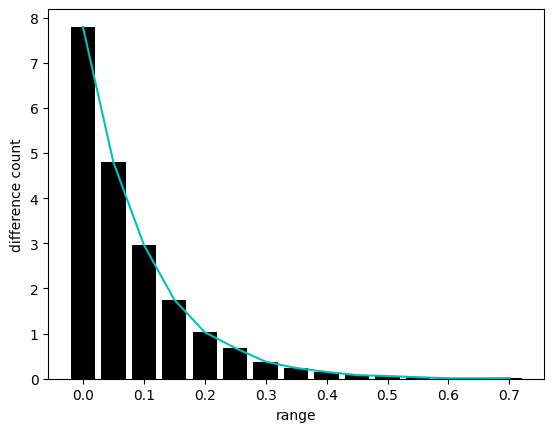

'density \nThere are similar but in our ISIs model we have also spikes just after previous spike.\nOtherwise they seem like exp(-x) function.\n'

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

diff=np.diff(drawing2)
print(diff)


bs=np.arange(0,0.8,0.05)

interval,range=np.histogram(diff,bs,density=True)
plt.bar(range[:-1],interval,width=0.04,color='black')
plt.xlabel("range")
plt.ylabel("difference count")
plt.plot(range[:-1],interval,color='c')
plt.show()
'''density
There are similar but in our ISIs model we have also spikes just after previous spike.
Otherwise they seem like exp(-x) function.
'''

ii. (2 points) Compute the mean, the standard deviation and the coefficient of variation (CV) of the ISIs using `numpy`. Compare the numbers with the theoretical values (see lecture).

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
mean1=np.mean(interval)
var1=np.var(interval)
var2=var1**(1/2)
cv=var2/mean1
print(var1,mean1,cv)
'''
Cause we have spikes just after previous spike, variance is a  higher than
theoretical value.In lecture,variance/mean ratio is approximately 4/3. In our experiment
the ratio is approximately 4.
'''


4.721741655754593 1.333333333333333 1.629717669218187


'\nCause we have spikes just after previous spike, variance is a  higher than \ntheoretical value.In lecture,variance/mean ratio is approximately 4/3. In our experiment\nthe ratio is approximately 4.\n'

### 2.\* Gamma process (3 optional points)
### (a) Spike-train generation (1 optional point)

A realisation of a Gamma process (https://en.wikipedia.org/wiki/Gamma_process) of integer order $\gamma \in \mathbb{N}_{\backslash\{0\}}$ can be generated from a realisation of a Poisson process by picking only each $\gamma$th spike (“decimation method”). Generate a realisation of a Gamma process with rate $\nu=10$ spikes/s and order $\gamma=2$.

Hint: Note that the decimation procedure reduces the firing rate and adjust for this accordingly.

In [ ]:

# type your code here.
import numpy as np
import matplotlib.pyplot as plt



np.set_printoptions(suppress=True)

def draw3(v,ß,T):
    N=v*T
    lst=list(np.random.uniform(0,T,N))
    lst=np.sort(lst)
    lst=lst[::ß]
    return lst
drawing3=draw3(10,2,600)
print(drawing3)

[  0.25921583   0.36912612   0.61225683 ... 599.49203649 599.55426952
 599.60962892]


### (b) Spike-count statistics (1 optional point)

See 1(b).

Hint: For a Gamma process of rate $\nu$ and order $\gamma = 2$, the spike-count variance is given by
$$ \frac{\nu h}{2}+\frac{1-e^{-4\nu h}}{8}$$
(see Gabbiani & Koch, 1998, Principles of spike-train analysis).

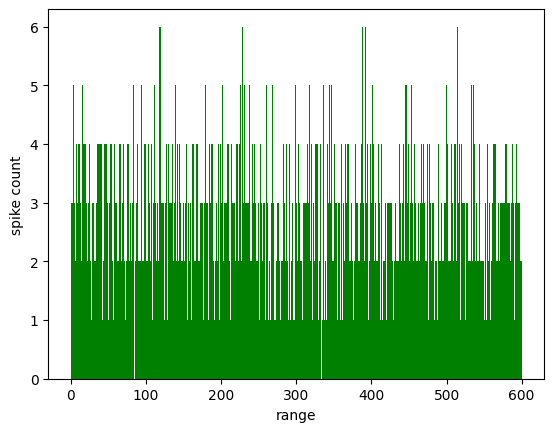

2.5 1.2883333333333333 0.5153333333333333


'\n\n'

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
h=0.5

bins=np.arange(0,600.5,h)

x1,y1=np.histogram(drawing3,bins )



plt.bar(y1[:-1],x1,color='green')
plt.xlabel("range")
plt.ylabel("spike count")
plt.show()

mean_gamma=np.mean(x1)
varianz_gamma=np.var(x1)
fano_gamma=varianz_gamma/mean_gamma
print(mean_gamma,varianz_gamma,fano_gamma)
'''

'''

### 3.\* Poisson process with refractoriness (1 optional point)
Generate a realisation of a Poisson process with absolute refractory period $\tau_R$, i.e., a process with ISI density
$$ f(x) =
   \begin{cases}
     \tilde{\nu}e^{-\tilde{\nu}{}x} & x\ge\tau_\text{R}\\
     0 & \text{else}.
   \end{cases}
$$
Hint: The process results from an ordinary Poisson process with ISIs $\tilde{X}_i$ and rate $\tilde{\nu}$ by adding the refractory
period to the inter-spike intervals, i.e., $X_i=\tilde{X}_i+\tau_R (\forall i)$.  
Note that the rate of the new process is reduced to
$$ \nu = \left[\frac{1}{\tilde{\nu}}+\tau_\text{R}\right]^{-1}$$
and adjust for this accordingly.

[  5.67100936   8.49344305   8.72603062  13.10135677  17.7693695
  21.48033316  27.06747992  47.21421051  48.75554726  52.28448919
  83.63778355  85.29782698  93.89185658 105.52611694 109.14653974
 117.03491852 120.23628147 129.76951671 134.56797932 139.90508511
 162.25639738 169.80443853 170.89113123 176.21218481 177.78370334
 182.62568259 186.22073925 194.70384272 195.10076564 195.57311815
 199.70046032 217.08779733 220.72777728 223.73737996 226.49376453
 229.16786324 238.13455784 245.08200388 249.6363683  251.82808773
 261.21133663 267.79742076 268.92635566 283.21572643 286.52817188
 287.85882026 289.90434102 303.25588212 308.81563634 319.65056165
 324.61901472 326.46750895 327.70480241 329.80711207 330.13605993
 356.99872465 357.12338174 378.03147024 381.56788431 394.49130517
 398.67931565 444.89092883 454.70168665 455.52757891 457.18972927
 459.38687336 461.62683627 473.34560573 478.30404943 488.73989621
 489.74887526 502.88740652 521.23222879 524.93734605 527.29673398
 532.582038

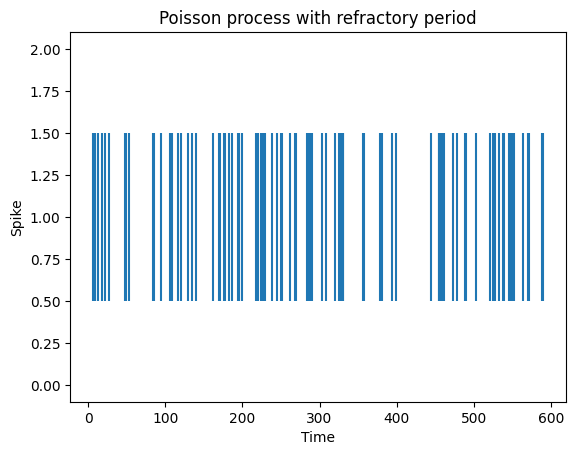

In [ ]:
# type your code here.
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

def draw4(v,r,T):
    ß= v / (np.exp(v * r) - 1)
    t=0
    lst=[]
    while t<T:

        t=np.random.exponential(ß)+t+r
        if t>T:
            break
        lst=np.append(lst,t)
    return lst
spike_times=draw4(10,0.1,600)
print(spike_times)
plt.eventplot(spike_times)
plt.xlabel('Time')
plt.ylabel('Spike')
plt.title('Poisson process with refractory period')
plt.show()

